In [3]:
# install the library first before executing this line
# using !pip install geopandas (for example)
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry as sg
import geopandas as gpd
import pandas as pd
from shapely.geometry import shape
from shapely.geometry import Point

In [25]:
# import shapefile and extract centroid from shape
AOI = gpd.read_file("AOI.shp")
AOI['centroid'] = AOI.geometry.centroid
x_values = AOI.geometry.centroid.x.tolist()
y_values = AOI.geometry.centroid.y.tolist()
point_init = [x_values[0], y_values[0]]
sidelength = 2000
cols = 10

In [27]:
# original code for generate_point_sequences
sequence_xy = []
point_init[0] = x_init
point_init[1] = y_init

for i in range(cols):
    x = i * 1.5 * sidelength
    y = i*np.sqrt(3)*1.5 * sidelength
    x_n = -x
    y_n = -y
    y_offset = []
    for a in range (cols - i):
        if (a + i) % 2 == 0:
            y_new = a * np.sqrt(3)/2 * sidelength
            y_offset.append(y_new)
        
    for idx,j in enumerate(y_offset):
        sequence_xy.append((x_init + x, y_init + j))
        sequence_xy.append((x_init - x, y_init - j))
        sequence_xy.append((x_init + x_n, y_init + j))
        sequence_xy.append((x_init - x_n, y_init - j))

seq_pt = [Point(x, y) for (x, y) in sequence_xy]

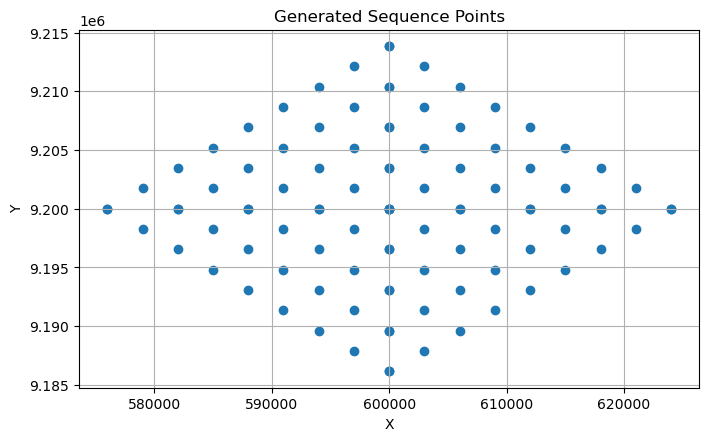

In [35]:
# Matplotlib Plotting the points (with correct aspect ratio):
x_coords = [point.x for point in seq_pt]
y_coords = [point.y for point in seq_pt]

plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Generated Sequence Points")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Shape Hexagon Succesfully Generated!


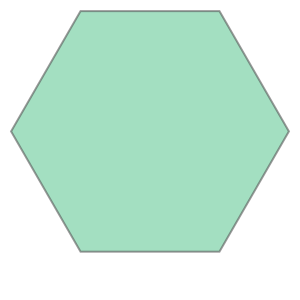

In [33]:
# raw code of generating hexagonal point shape

s = 2000
x_init, y_init = 600000,9200000

# initiate theta of equilateral hexagon, which is 120 degrees
int_angle = 2*np.pi/3 

#initiate an empty list
coor_list = []

# initiate first state of integer variable for looping purposes
a = 0
point_x = x_init
point_y = y_init

# do the loop for coordinate plotting
while a < 6: 
    # state a first theta, and repeat by a += 1
    theta = a * int_angle
    a += 1

    # calculate x and y variable 
    x = s*(np.cos(theta)) + point_x
    y = s*(np.sin(theta)) + point_y
        
        
    # state a conditional statements on loop in even numbers
    if a % 2 == 0:
        x = s*(np.cos(theta))*(-1) + point_x
        y = s*(np.sin(theta))*(-1) + point_y
        
    # put all of the output to coor_list variable
    coor_list.append((x,y))

hexagon = sg.Polygon(coor_list)
print ("Shape Hexagon Succesfully Generated!")
hexagon